In [1]:
import BioSimSpace as BSS

/home/nichrun/miniconda3/envs/data_driven_fep_rel/lib/python3.7/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')
/home/nichrun/miniconda3/envs/data_driven_fep_rel/lib/python3.7/site-packages/BioSimSpace/IO/_io.py:343: UserWarning: BioSimSpace.IO: Please install GROMACS (http://www.gromacs.org) for GROMACS topology file support.
  _warnings.warn("BioSimSpace.IO: Please install GROMACS (http://www.gromacs.org) "


In [15]:
#Converts SDF files to MOL2, and brings into current directory
from pathlib import Path
import glob
import openbabel
from openbabel import pybel


#Taking mole files for cluster directory
mol_files = glob.glob("../clusters/cluster_m3_feat_4/*.sdf")
#List of names, where file name is index
mol_names = [file.split("/")[3].rstrip(".sdf") for file in mol_files]
#Where to save .mol2 files
mol_dir = ""
"""
#Loop imports molecules in cluster as sdf, perfoms gaff geometry optimisation,
#and saves molecule as .mol2
for file, name in zip(mol_files, mol_names):
    
    mol = next(pybel.readfile("sdf", file)) # Generator requires next
    mol.addh()
    mol.make3D(forcefield="gaff", steps=500)
    mol.write("mol2", f'{mol_dir}{str(name)}.mol2', overwrite=True)
"""
mol2_files = glob.glob(f"{mol_dir}*.mol2")


In [41]:
#mol0 = BSS.IO.readMolecules(mol2_files[0]).getMolecule(0)
#view = BSS.Notebook.View(mol0)
#view.molecule(0)

NGLWidget(gui_style='ngl')

In [49]:
#mol1 = BSS.IO.readMolecules(mol2_files[1]).getMolecule(0)
#view = BSS.Notebook.View(mol0)
#view.molecule(0)

In [92]:
mol0 = BSS.IO.readMolecules(mol2_files[0])[0]
mol1 = BSS.IO.readMolecules(mol2_files[1])[0]

In [93]:
#mol0 = BSS.Parameters.gaff(mol0)
#mol1 = BSS.Parameters.gaff(mol1)

In [94]:
mol0 = BSS.Parameters.gaff(mol0)
#mol1 = mol1.getMolecule()

In [95]:
mol0.getMolecule()

KeyboardInterrupt: 

In [81]:
mapping = BSS.Align.matchAtoms(mol0, mol1)

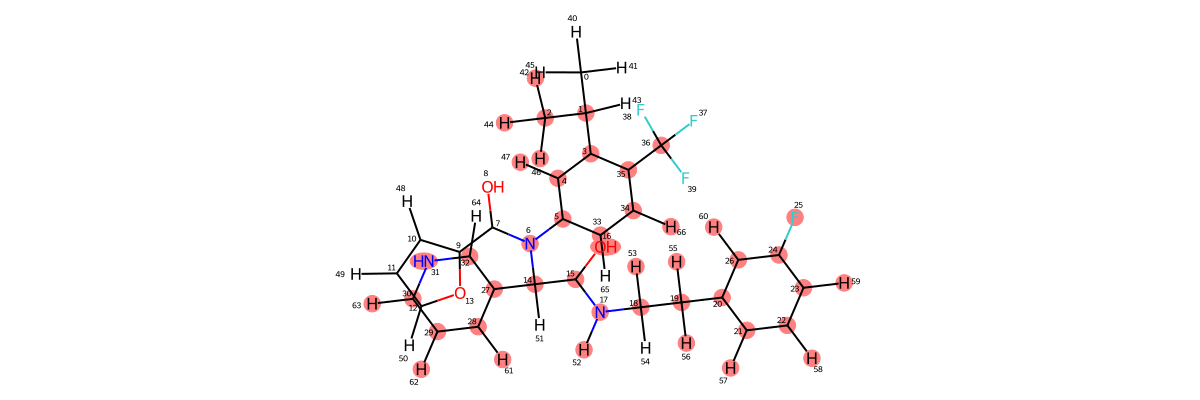

In [82]:
BSS.Align.drawMapping(mol0, mol1, mapping)

In [83]:
mol0 = BSS.Align.rmsdAlign(mol0, mol1, mapping)

In [84]:
#Tried to skip forcefield step.
merged = BSS.Align.merge(mol0, mol1, mapping)

IncompatibleError: Cannot determine 'forcefield' of 'molecule1'!